# Perform analysis and plots shown in paper

- I am using the conda environment version 21.10 http://climate-cms.wikis.unsw.edu.au/Conda#21.10
- The plots (and some extra analysis) are provided in order 

In [1]:
cd /home/563/slf563/code/gadi/jk72/ACCESS-CM2_analysis/COSP_analysis/Clustering_paper

/home/563/slf563/code/gadi/jk72/ACCESS-CM2_analysis/COSP_analysis/Clustering_paper


In [2]:
import sys
import os
from functions import *
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import seaborn as sns
import xarray as xr
matplotlib.rcParams['pdf.fonttype'] = 42
import time
from matplotlib.colors import LogNorm

In [3]:
from dask.distributed import Client,LocalCluster
client = Client()

# Read data & define some universal functions

### Read the clusters and labels

In [4]:
RFO_M10 = xr.open_dataarray('/g/data/jk72/slf563/ACCESS/clustering_data/modis_RFO_2015-2019_condensed.nc')
RFO_A10 = xr.open_dataarray('/g/data/jk72/slf563/ACCESS/clustering_data/bx400_RFO_2015-2019_condensed.nc')
centers10 = xr.open_dataarray('/g/data/jk72/slf563/ACCESS/clustering_data/modis_cluster_centres_2015-2019_condensed.nc')
centers = xr.open_dataarray('/g/data/jk72/slf563/ACCESS/clustering_data/modis_cluster_centres_2015-2019.nc')

RFO_M10_seas = xr.open_dataarray('/g/data/jk72/slf563/ACCESS/clustering_data/modis_RFO_2015-2019_condensed_seas.nc')
RFO_A10_seas = xr.open_dataarray('/g/data/jk72/slf563/ACCESS/clustering_data/bx400_RFO_2015-2019_condensed_seas.nc')

In [5]:
M10 = xr.open_dataset('/g/data/jk72/slf563/ACCESS/clustering_data/modis_cluster_labels_condensed_2015-2019.nc')
A10 = xr.open_dataset('/g/data/jk72/slf563/ACCESS/clustering_data/bx400_cluster_labels_condensed_2015-2019.nc')

In [6]:
nclus = centers10['k'].shape[0]
plevs = centers10.attrs['Cloud top pressure']
plevs[-1] = np.infty
tau = centers10.attrs['Cloud optical depth']
cluster_names = centers10.attrs['Cluster Long Names']
cluster_short_names = centers10.attrs['Cluster Short Names']

In [7]:
order_for_plotting = [6,2,4,5,8,1,0,3,7,9]

### Read the other obs/model data

In [8]:
obs = xr.open_dataset('/g/data/jk72/slf563/ACCESS/clustering_data/COSP_vars_MODIS_2015-2019.nc')
obs = obs.transpose('time','lat','lon')
mod = xr.open_dataset('/g/data/jk72/slf563/ACCESS/clustering_data/COSP_vars_bx400_2015-2019.nc')

In [9]:
biases = mod-obs
biases = biases.drop_vars('Cluster')

In [10]:
modsea = mod.groupby('time.season').mean()
obssea = obs.groupby('time.season').mean()
biasesea = biases.groupby('time.season').mean()

*********
# Figure 1: 

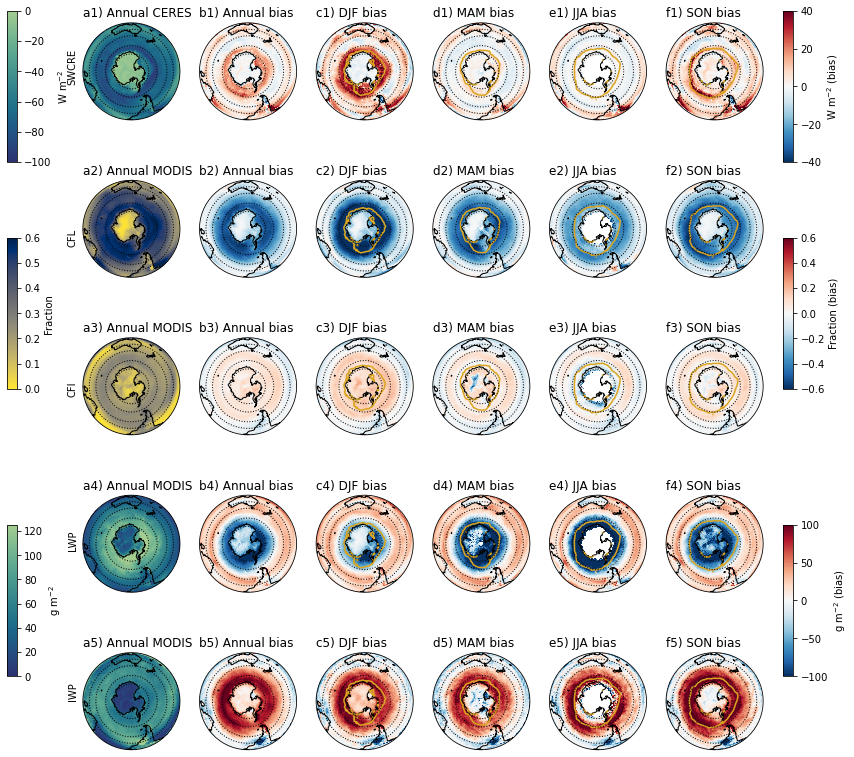

In [11]:
fig = plt.figure(figsize=(14,14))

p2 = plot_biases((obs.SWCREtoa).mean('time'),'a1) Annual CERES',561,-100,0,
                cmap=sns.color_palette("crest_r", as_cmap=True))
p = plot_biases((biases.SWCREtoa).mean('time'),'b1) Annual bias',562,-40,40,)
p = plot_biases((biasesea.SWCREtoa).sel(season='DJF'),'c1) DJF bias',563,-40,40,sea='DJF')
p = plot_biases((biasesea.SWCREtoa).sel(season='MAM'),'d1) MAM bias',564,-40,40,sea='MAM')
p = plot_biases((biasesea.SWCREtoa).sel(season='JJA'),'e1) JJA bias',565,-40,40,sea='JJA')
p = plot_biases((biasesea.SWCREtoa).sel(season='SON'),'f1) SON bias',566,-40,40,sea='SON')

cax = plt.axes([0.82, 0.725, 0.01, 0.15])
plt.colorbar(p,cax=cax,label='W m$^{-2}$ (bias)')
     
cax = plt.axes([0.05, 0.725, 0.01, 0.15])
plt.colorbar(p2,cax=cax,label='W m$^{-2}$')

#**************************************************************************

p2 = plot_biases((obs.CFL).mean('time'),'a2) Annual MODIS',567,0,0.6,
                cmap=sns.color_palette("cividis_r", as_cmap=True))
p = plot_biases((biases.CFL).mean('time'),'b2) Annual bias',568,-0.6,0.6)
p = plot_biases((biasesea.CFL).sel(season='DJF'),'c2) DJF bias',569,-0.6,0.6,sea='DJF')
p = plot_biases((biasesea.CFL).sel(season='MAM'),'d2) MAM bias',[5,6,10],-0.6,0.6,sea='MAM')
p = plot_biases((biasesea.CFL).sel(season='JJA'),'e2) JJA bias',[5,6,11],-0.6,0.6,sea='JJA')
p = plot_biases((biasesea.CFL).sel(season='SON'),'f2) SON bias',[5,6,12],-0.6,0.6,sea='SON')

#**************************************************************************

p2 = plot_biases((obs.CFI).mean('time'),'a3) Annual MODIS',[5,6,13],0,0.6,
                cmap=sns.color_palette("cividis_r", as_cmap=True))
p = plot_biases(biases.CFI.mean('time'),'b3) Annual bias',[5,6,14],-0.6,0.6)
p = plot_biases(biasesea.CFI.sel(season='DJF'),'c3) DJF bias',[5,6,15],-0.6,0.6,sea='DJF')
p = plot_biases(biasesea.CFI.sel(season='MAM'),'d3) MAM bias',[5,6,16],-0.6,0.6,sea='MAM')
p = plot_biases(biasesea.CFI.sel(season='JJA'),'e3) JJA bias',[5,6,17],-0.6,0.6,sea='JJA')
p = plot_biases(biasesea.CFI.sel(season='SON'),'f3) SON bias',[5,6,18],-0.6,0.6,sea='SON')

cax = plt.axes([0.82, 0.5, 0.01, 0.15])
plt.colorbar(p,cax=cax,label='Fraction (bias)')
     
cax = plt.axes([0.05, 0.5, 0.01, 0.15])
plt.colorbar(p2,cax=cax,label='Fraction')

#**************************************************************************

p2 = plot_biases((obs.LWP).mean('time'),'a4) Annual MODIS',[5,6,19],0,125,
                cmap=sns.color_palette("crest_r", as_cmap=True))
p = plot_biases((biases.LWP).mean('time'),'b4) Annual bias',[5,6,20],-100,100)
p = plot_biases((biasesea.LWP).sel(season='DJF'),'c4) DJF bias',[5,6,21],-100,100,sea='DJF')
p = plot_biases((biasesea.LWP).sel(season='MAM'),'d4) MAM bias',[5,6,22],-100,100,sea='MAM')
p = plot_biases((biasesea.LWP).sel(season='JJA'),'e4) JJA bias',[5,6,23],-100,100,sea='JJA')
p = plot_biases((biasesea.LWP).sel(season='SON'),'f4) SON bias',[5,6,24],-100,100,sea='SON')

#**************************************************************************

p2 = plot_biases((obs.IWP).mean('time'),'a5) Annual MODIS',[5,6,25],0,125,
                cmap=sns.color_palette("crest_r", as_cmap=True))
p = plot_biases((biases.IWP).mean('time'),'b5) Annual bias',[5,6,26],-100,100)
p = plot_biases((biasesea.IWP).sel(season='DJF'),'c5) DJF bias',[5,6,27],-100,100,sea='DJF')
p = plot_biases((biasesea.IWP).sel(season='MAM'),'d5) MAM bias',[5,6,28],-100,100,sea='MAM')
p = plot_biases((biasesea.IWP).sel(season='JJA'),'e5) JJA bias',[5,6,29],-100,100,sea='JJA')
p = plot_biases((biasesea.IWP).sel(season='SON'),'f5) SON bias',[5,6,30],-100,100,sea='SON')

cax = plt.axes([0.82, 0.215, 0.01, 0.15])
plt.colorbar(p,cax=cax,label='g m$^{-2}$ (bias)')
     
cax = plt.axes([0.05, 0.215, 0.01, 0.15])
plt.colorbar(p2,cax=cax,label='g m$^{-2}$')

#**************************************************************************

plt.figtext(0.11,0.82,'SWCRE',rotation='vertical',va='center')
plt.figtext(0.11,0.65,'CFL',rotation='vertical',va='center')
plt.figtext(0.11,0.5,'CFI',rotation='vertical',va='center')
plt.figtext(0.11,0.35,'LWP',rotation='vertical',va='center')
plt.figtext(0.11,0.2,'IWP',rotation='vertical',va='center')

#plt.suptitle('TOA outgoing shortwave CRE',size=14);
plt.subplots_adjust(right=0.8)
plt.savefig('plots/TOA_SWCRE+cloud_biases.png',dpi=400)

### Some useful numbers to go with Fig 1

In [12]:
print('Polar region')
biasesea[['SWCREtoa','CFL','CFI','LWP','IWP']].sel(lat=slice(-69,-58)).mean(['lat','lon']).to_dataframe()

Polar region


,SWCREtoa,CFL,CFI,LWP,IWP
season,,,,,
DJF,24.666115,-0.590503,0.124781,-38.737667,86.338081
JJA,0.457556,-0.295685,-0.059560,-138.463451,63.639626
MAM,2.396084,-0.458478,0.036803,-82.014036,73.426272
SON,10.620443,-0.437960,0.048850,-64.852452,96.640370


In [13]:
biases[['SWCREtoa','CFL','CFI','LWP','IWP']].sel(lat=slice(-69,-58)).mean()

<xarray.Dataset>
Dimensions:   ()
Data variables:
    SWCREtoa  float64 12.59
    CFL       float64 -0.4878
    CFI       float64 0.06366
    LWP       float64 -61.37
    IWP       float64 85.59

In [14]:
print('Sub-polar region')
biasesea[['SWCREtoa','CFL','CFI','LWP','IWP']].sel(lat=slice(-58,-43)).mean(['lat','lon']).to_dataframe()

Sub-polar region


,SWCREtoa,CFL,CFI,LWP,IWP
season,,,,,
DJF,5.074187,-0.343010,0.107656,18.236258,45.531334
JJA,-1.524821,-0.305289,0.026683,-17.586346,59.858750
MAM,-2.313541,-0.316254,0.065729,0.706973,43.577476
SON,3.069688,-0.383407,0.079684,3.853717,67.277155


In [15]:
biases[['SWCREtoa','CFL','CFI','LWP','IWP']].sel(lat=slice(-58,-43)).mean()

<xarray.Dataset>
Dimensions:   ()
Data variables:
    SWCREtoa  float64 1.065
    CFL       float64 -0.3377
    CFI       float64 0.07179
    LWP       float64 2.962
    IWP       float64 55.12

In [16]:
print('Mid-lats region')
biasesea[['SWCREtoa','CFL','CFI','LWP','IWP']].sel(lat=slice(-43,-30)).mean(['lat','lon']).to_dataframe() 

Mid-lats region


,SWCREtoa,CFL,CFI,LWP,IWP
season,,,,,
DJF,8.367152,-0.076264,-0.022572,22.352128,-3.382313
JJA,-0.276823,-0.127304,-0.011038,27.888771,5.016699
MAM,1.280416,-0.079709,-0.029487,27.456408,-3.015486
SON,5.947168,-0.153902,-0.000335,25.014786,11.414541


In [17]:
biases[['SWCREtoa','CFL','CFI','LWP','IWP']].sel(lat=slice(-43,-30)).mean()

<xarray.Dataset>
Dimensions:   ()
Data variables:
    SWCREtoa  float64 3.544
    CFL       float64 -0.1114
    CFI       float64 -0.01336
    LWP       float64 26.61
    IWP       float64 4.89

*****

# Figure 2

/local/jk72/slf563/tmp/ipykernel_1757870/2833419821.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(' ')
/local/jk72/slf563/tmp/ipykernel_1757870/2833419821.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(' ')


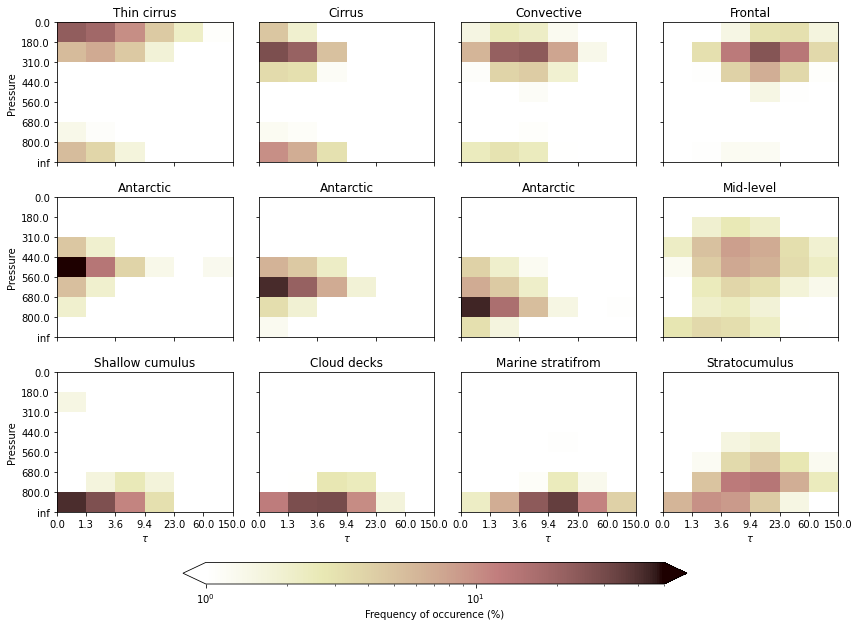

In [18]:
fig = plt.figure(figsize=(14,10))
# This is the only place I show the 12 clusters..
all_cluster_names = np.array(['Marine stratifrom','Stratocumulus','Antarctic','Cirrus',
                 'Cloud decks','Convective','Frontal','Thin cirrus','Antarctic',
                 'Shallow cumulus','Antarctic','Mid-level'])

for i,k in enumerate([7,3,5,6,10,2,8,11,9,4,0,1]):
    ax = plt.subplot(3,4,i+1)
    mesh = plt.pcolormesh(centers[k,:,:]*100,
                          cmap='pink_r',#vmin=0.1, vmax=30,
                          norm=colors.LogNorm(vmin=1, vmax=50),
                         )
    if i > 7:
        plt.xlabel('${\\tau}$')
        plt.xticks(np.arange(0,7))
        ax.set_xticklabels(tau)
    else: 
        ax.set_xticklabels(' ')
    
    if i in [0,4,8]:
        plt.ylabel('Pressure')
        plt.yticks(np.arange(0,8))
        ax.set_yticklabels(np.flip(plevs))
    else:
        ax.set_yticklabels(' ')
    
    plt.title('{}'.format(all_cluster_names[k]))

cax = plt.axes([0.25, 0.1, 0.5, 0.03])
plt.colorbar(mesh,cax=cax,orientation='horizontal',extend='both',
             label='Frequency of occurence (%)');

plt.subplots_adjust(hspace=0.25,wspace=0.15,bottom=0.2)
plt.savefig('plots/Fig_cluster_centers_{}.pdf'.format(nclus))

*** 
# Figure 3

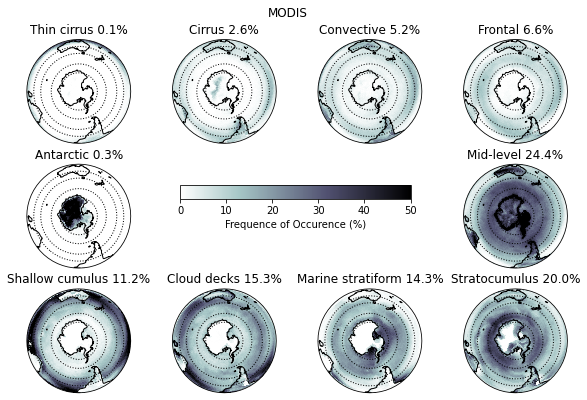

In [19]:
fig = plt.figure(figsize=(10,6.5))

for i,c in enumerate([7,3,5,6,10,9,8,4,1,2]):
    if i>4 : i = i+2
    ax = plt.subplot(3,4,i+1, projection=ccrs.Orthographic(140, -90))
    p = RFO_M10.sel(Cluster=c).T.plot(
            cmap='bone_r',
            transform=ccrs.PlateCarree(),
            ax = ax,
            vmin=0,vmax=50,
            add_colorbar=False);
    p.axes.coastlines();
    plt.title('{} {}%'.format(cluster_names[c-1],(RFO_M10.sel(Cluster=c).sel(lat=slice(-69,-30)).mean()).round(1).values))
    plot_line()
    
cax = plt.axes([0.35, 0.54, 0.32, 0.03])
plt.colorbar(p,cax=cax,orientation='horizontal',
             label='Frequence of Occurence (%)');

plt.suptitle('MODIS',y=0.95);
plt.savefig('plots/MODIS_RFO_condensed_SH.pdf')

***
# Figure 4

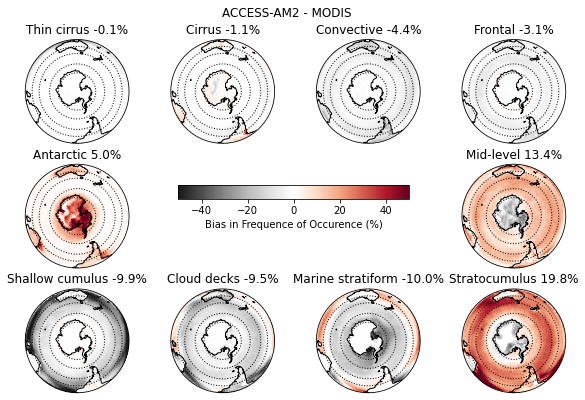

In [20]:
fig = plt.figure(figsize=(10,6.5))

for i,c in enumerate([7,3,5,6,10,9,8,4,1,2]):
    if i>4 : i = i+2
    ax = plt.subplot(3,4,i+1, projection=ccrs.Orthographic(140, -90))
    p = (RFO_A10-RFO_M10).sel(Cluster=c).T.plot(
            cmap='RdGy_r',
            transform=ccrs.PlateCarree(),
            ax = ax,
            vmin=-50,vmax=50,
            add_colorbar=False);
    p.axes.coastlines();
    plt.title('{} {}%'.format(cluster_names[c-1],((RFO_A10-RFO_M10).sel(Cluster=c).sel(lat=slice(-69,-30)).mean()).round(1).values))
    plot_line()
    
cax = plt.axes([0.35, 0.54, 0.32, 0.03])
plt.colorbar(p,cax=cax,orientation='horizontal',
             label='Bias in Frequence of Occurence (%)');

plt.suptitle('ACCESS-AM2 - MODIS',y=0.95);
plt.savefig('plots/ACCESS-MODIS_RFO_Condensed_SH.pdf')

*** 
# Figure 5

In [21]:
RFOs = (RFO_M10_seas.copy()/100).isel(Cluster=order_for_plotting)
RFOm = (RFO_A10_seas.copy()/100).isel(Cluster=order_for_plotting)
dRFO = (RFOm - RFOs)

In [22]:
lat1=-69
lat2=-58
FbiasP = (biasesea*RFOs).sel(lat=slice(lat1,lat2)).mean(('lat','lon'))
FbiasP = FbiasP.assign_coords({'Region':'zP'})
RFObiasP = (obssea.drop_vars('Cluster')*dRFO).sel(lat=slice(lat1,lat2)).mean(('lat','lon'))
RFObiasP = RFObiasP.assign_coords({'Region':'zP'})
SOCbiasP = (biasesea*dRFO).sel(lat=slice(lat1,lat2)).mean(('lat','lon'))
SOCbiasP = SOCbiasP.assign_coords({'Region':'zP'})
totbiasP = FbiasP+RFObiasP+SOCbiasP
totalP = biasesea.sel(lat=slice(lat1,lat2)).mean(('lat','lon')).assign_coords({'Region':'zP'})

In [23]:
lat1=-58
lat2=-43
FbiasS = (biasesea*RFOs).sel(lat=slice(lat1,lat2)).mean(('lat','lon'))
FbiasS = FbiasS.assign_coords({'Region':'SP'})
RFObiasS = (obssea.drop_vars('Cluster')*dRFO).sel(lat=slice(lat1,lat2)).mean(('lat','lon'))
RFObiasS = RFObiasS.assign_coords({'Region':'SP'})
SOCbiasS = (biasesea*dRFO).sel(lat=slice(lat1,lat2)).mean(('lat','lon'))
SOCbiasS = SOCbiasS.assign_coords({'Region':'SP'})
totbiasS = FbiasS+RFObiasS+SOCbiasS
totalS = biasesea.sel(lat=slice(lat1,lat2)).mean(('lat','lon')).assign_coords({'Region':'SP'})

In [24]:
lat1=-43
lat2=-30
FbiasM = (biasesea*RFOs).sel(lat=slice(lat1,lat2)).mean(('lat','lon'))
FbiasM = FbiasM.assign_coords({'Region':'ML'})
RFObiasM = (obssea.drop_vars('Cluster')*dRFO).sel(lat=slice(lat1,lat2)).mean(('lat','lon'))
RFObiasM = RFObiasM.assign_coords({'Region':'ML'})
SOCbiasM = (biasesea*dRFO).sel(lat=slice(lat1,lat2)).mean(('lat','lon'))
SOCbiasM = SOCbiasM.assign_coords({'Region':'ML'})
totbiasM = FbiasM+RFObiasM+SOCbiasM
totalM = biasesea.sel(lat=slice(lat1,lat2)).mean(('lat','lon')).assign_coords({'Region':'ML'})

In [25]:
Fbias = xr.concat((FbiasM,FbiasS,FbiasP),dim='Region')
RFObias = xr.concat((RFObiasM,RFObiasS,RFObiasP),dim='Region')
SOCbias = xr.concat((SOCbiasM,SOCbiasS,SOCbiasP),dim='Region')
totbias = xr.concat((totbiasM,totbiasS,totbiasP),dim='Region')
total = xr.concat((totalM,totalS,totalP),dim='Region')

In [26]:
RFObiasdf = RFObias.to_dataframe().reset_index()
SOCbiasdf = SOCbias.to_dataframe().reset_index()
Fbiasdf = Fbias.to_dataframe().reset_index()
totbiasdf = totbias.to_dataframe().reset_index()
totaldf = total.to_dataframe().reset_index()

In [27]:
sea = 'DJF'
var = 'SWCREtoa'
a = RFObiasdf[[var,'Region','Cluster']].where(RFObiasdf.season==sea).dropna()
b = SOCbiasdf[[var,'Region','Cluster']].where(SOCbiasdf.season==sea).dropna()
c = Fbiasdf[[var,'Region','Cluster']].where(Fbiasdf.season==sea).dropna()
d = totbiasdf[[var,'Region','Cluster']].where(totbiasdf.season==sea).dropna()

In [28]:
def data_for_bias_decomp_plot(sea,var):
    a = RFObiasdf[[var,'Region','Cluster']].where(RFObiasdf.season==sea).dropna()
    b = SOCbiasdf[[var,'Region','Cluster']].where(SOCbiasdf.season==sea).dropna()
    c = Fbiasdf[[var,'Region','Cluster']].where(Fbiasdf.season==sea).dropna()
    d = totbiasdf[[var,'Region','Cluster']].where(totbiasdf.season==sea).dropna()
    

    b1 = np.zeros(30)
    for i in range(len(a)):
        if (b.iloc[i,0] > 0) and (a.iloc[i,0] > 0):
            b1[i]=b.iloc[i,0]+a.iloc[i,0]
        elif (b.iloc[i,0] < 0) and (a.iloc[i,0] < 0):
            b1[i]=b.iloc[i,0]+a.iloc[i,0]
        else: 
            b1[i] = b.iloc[i,0]

    c1 = np.zeros(30)      
    for i in range(len(a)):
        if (c.iloc[i,0] > 0) and (b1[i] > 0):
            c1[i]=c.iloc[i,0]+b1[i]
        elif (c.iloc[i,0] < 0) and (b1[i] < 0):
            c1[i]=c.iloc[i,0]+b1[i]
        elif (c.iloc[i,0] > 0) and (b.iloc[i,0] > 0):
            c1[i]=c.iloc[i,0]+b.iloc[i,0]
        elif (c.iloc[i,0] < 0) and (b.iloc[i,0] < 0):
            c1[i]=c.iloc[i,0]+b.iloc[i,0]
        elif (c.iloc[i,0] > 0) and (a.iloc[i,0] > 0):
            c1[i]=c.iloc[i,0]+b.iloc[i,0]
        elif (c.iloc[i,0] < 0) and (a.iloc[i,0] < 0):
            c1[i]=c.iloc[i,0]+a.iloc[i,0]
        else: 
            c1[i] = c.iloc[i,0]
            
    b.iloc[:,0] = b1
    c.iloc[:,0] = c1

    return a,b,c,d

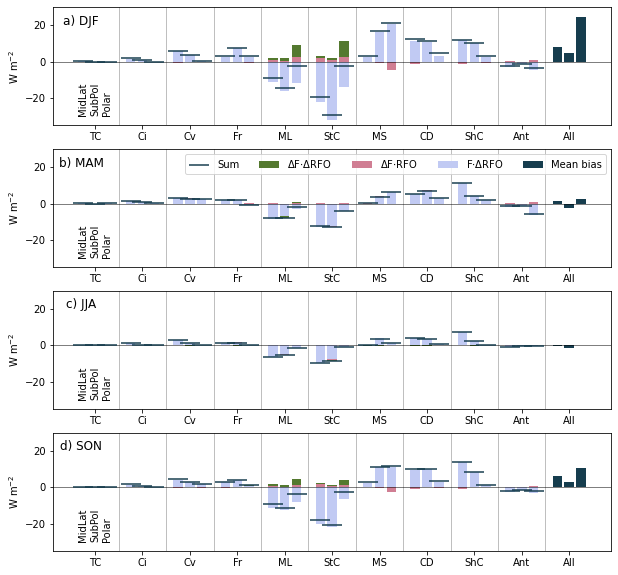

In [29]:
var = 'SWCREtoa'
cm = sns.color_palette("cubehelix",4)
x = [1,2,3,5,6,7,9,10,11,13,14,15,17,18,19,21,22,23,25,26,27,29,30,31,33,34,35,37,38,39]
names = np.array(cluster_short_names).copy()[order_for_plotting]
names = np.append(names,'All')
abc = ['a','b','c','d']
fig = plt.figure(figsize=(10,10))

for i,sea in enumerate(['DJF','MAM','JJA','SON']):
    a,b,c,d = data_for_bias_decomp_plot(sea,var)

    ax = plt.subplot(411+i)
    plt.bar(x=x,
            height=c[var],
            alpha=1,
            color=cm[1],label='$\Delta$F$\cdot$$\Delta$RFO')
    plt.bar(x=x,
            height=b[var],
            alpha=1,
            color=cm[2],label='$\Delta$F$\cdot$RFO')
    plt.bar(x=x,
            height=a[var],
            alpha=1,
            color=cm[3],label='F$\cdot$$\Delta$RFO')
    plt.scatter(x=x,y=d[var],
                marker='_',label='Sum',color=cm[0],s=400,zorder=20)
    
    plt.bar(x=[41,42,43],
            height=totaldf[[var,'Region']].where(totaldf.season==sea).dropna().sort_values(['Region'])[var],
            alpha=1,
            color=cm[0],label='Mean bias')
     
    plt.text(1,-30,'MidLat',rotation=90,horizontalalignment='center',verticalalignment='bottom')
    plt.text(2,-30,'SubPol',rotation=90,horizontalalignment='center',verticalalignment='bottom')
    plt.text(3,-30,'Polar',rotation=90,horizontalalignment='center',verticalalignment='bottom')
    
    [ax.axvline(i,color='grey',linewidth=0.5) for i in np.arange(4,44,4)]
    plt.title('{}) {}'.format(abc[i],sea),x=0.05,y=0.8)
    plt.axhline(0,color='black',linewidth=0.5)
    #[plt.axhline(x,color='grey',linewidth=0.5,linestyle='--') for x in np.arange(-15,40,5)]
    plt.ylim(-35,30);
    plt.ylabel('W m$^{-2}$')
    ax.set_xticks(np.arange(2,44,4))
    ax.set_xticklabels(names)
    if sea=='MAM': plt.legend(ncol=5,loc='upper right');
        
plt.savefig('plots/radiative_bias_decomp_SO_regions.pdf')

***
# Figure 7

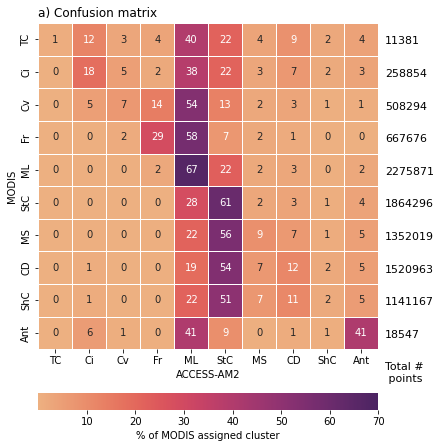

In [30]:
occurrance = np.zeros((nclus,nclus))
for i,c in enumerate(order_for_plotting):
    tmp = A10.sel(lat=slice(-69,-30)).where(M10.sel(lat=slice(-69,-30))==c)  # Find all the points in ACCESS where MODIS equals a certain cluster
    for ii,cc in enumerate(order_for_plotting):
        occurrance[i,ii] = tmp.where(tmp==cc).count().Cluster # Find what these points were assigned to by ACCESS. 
    occurrance[i,:] = (occurrance[i,:]/occurrance[i,:].sum())*100 # Divide by the total number of points in the MODIS cluster


fig = plt.figure(figsize=(7,8))
ax = plt.subplot(111)
sns.heatmap(occurrance, annot=True,linewidths=.5, ax=ax, fmt='.0f', cmap='flare',
            cbar_kws=({'label':'% of MODIS assigned cluster','orientation':'horizontal',
                      'pad':0.1}),#norm=LogNorm(),
            xticklabels=np.array(cluster_short_names)[order_for_plotting],
            yticklabels=np.array(cluster_short_names)[order_for_plotting],
            vmax=70);
plt.xlabel('ACCESS-AM2');
plt.ylabel('MODIS');

for i,c in enumerate(order_for_plotting):
    plt.text(10.2,i+0.65,'{}'.format(A10.sel(lat=slice(-69,-30)).where(M10.sel(lat=slice(-69,-30))==c).count().Cluster.values),size=11)
plt.text(10.2,11,'Total # \n points',size=11)
plt.title('a) Confusion matrix',loc='left');

plt.subplots_adjust(right=0.8)
plt.savefig('plots/confusion_SH.pdf')

### Revised figure 

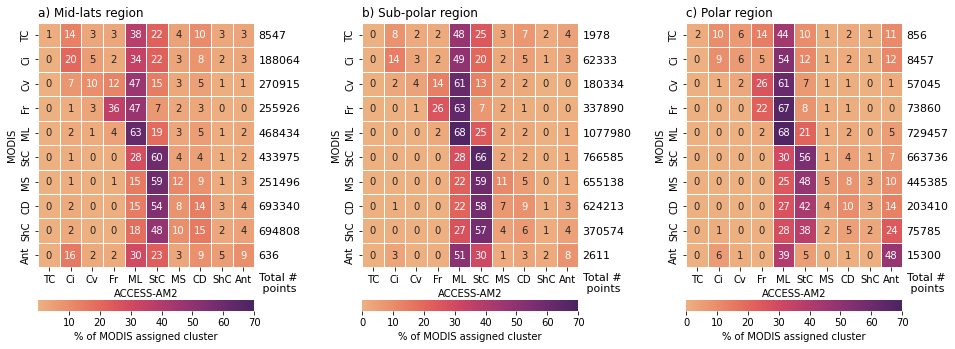

In [31]:
fig = plt.figure(figsize=(15,6))

#*****************************************
# Polar
ax = plt.subplot(133)

occurrance = np.zeros((nclus,nclus))
for i,c in enumerate(order_for_plotting):
    tmp = A10.sel(lat=slice(-69,-58)).where(M10.sel(lat=slice(-69,-58))==c)  # Find all the points in ACCESS where MODIS equals a certain cluster
    for ii,cc in enumerate(order_for_plotting):
        occurrance[i,ii] = tmp.where(tmp==cc).count().Cluster # Find what these points were assigned to by ACCESS. 
    occurrance[i,:] = (occurrance[i,:]/occurrance[i,:].sum())*100 # Divide by the total number of points in the MODIS cluster
    
    
sns.heatmap(occurrance, annot=True,linewidths=.5, ax=ax, fmt='.0f', cmap='flare',
            cbar_kws=({'label':'% of MODIS assigned cluster','orientation':'horizontal',
                      'pad':0.1}),#norm=LogNorm(),
            xticklabels=np.array(cluster_short_names)[order_for_plotting],
            yticklabels=np.array(cluster_short_names)[order_for_plotting],vmax=70);
plt.xlabel('ACCESS-AM2');
plt.ylabel('MODIS');

for i,c in enumerate(order_for_plotting):
    plt.text(10.2,i+0.65,'{}'.format(A10.sel(lat=slice(-69,-58)).where(M10.sel(lat=slice(-69,-58))==c).count().Cluster.values),size=11)
plt.text(10.2,11,'Total # \n points',size=11)
plt.title('c) Polar region',loc='left');

#*****************************************
# Sub-polar

ax = plt.subplot(132)

occurrance = np.zeros((nclus,nclus))
for i,c in enumerate(order_for_plotting):
    tmp = A10.sel(lat=slice(-58,-43)).where(M10.sel(lat=slice(-58,-43))==c)  # Find all the points in ACCESS where MODIS equals a certain cluster
    for ii,cc in enumerate(order_for_plotting):
        occurrance[i,ii] = tmp.where(tmp==cc).count().Cluster # Find what these points were assigned to by ACCESS. 
    occurrance[i,:] = (occurrance[i,:]/occurrance[i,:].sum())*100 # Divide by the total number of points in the MODIS cluster
    
sns.heatmap(occurrance, annot=True,linewidths=.5, ax=ax, fmt='.0f', cmap='flare',
            cbar_kws=({'label':'% of MODIS assigned cluster','orientation':'horizontal',
                      'pad':0.1}),#norm=LogNorm(),
            xticklabels=np.array(cluster_short_names)[order_for_plotting],
            yticklabels=np.array(cluster_short_names)[order_for_plotting],vmax=70);
plt.xlabel('ACCESS-AM2');
plt.ylabel('MODIS');

for i,c in enumerate(order_for_plotting):
    plt.text(10.2,i+0.65,'{}'.format(A10.sel(lat=slice(-58,-43)).where(M10.sel(lat=slice(-58,-43))==c).count().Cluster.values),size=11)
plt.text(10.2,11,'Total # \n points',size=11)
plt.title('b) Sub-polar region',loc='left');

#*****************************************
# Mid-lats

ax = plt.subplot(131)

occurrance = np.zeros((nclus,nclus))
for i,c in enumerate(order_for_plotting):
    tmp = A10.sel(lat=slice(-43,-30)).where(M10.sel(lat=slice(-43,-30))==c)  # Find all the points in ACCESS where MODIS equals a certain cluster
    for ii,cc in enumerate(order_for_plotting):
        occurrance[i,ii] = tmp.where(tmp==cc).count().Cluster # Find what these points were assigned to by ACCESS. 
    occurrance[i,:] = (occurrance[i,:]/occurrance[i,:].sum())*100 # Divide by the total number of points in the MODIS cluster
    
sns.heatmap(occurrance, annot=True,linewidths=.5, ax=ax, fmt='.0f', cmap='flare',
            cbar_kws=({'label':'% of MODIS assigned cluster','orientation':'horizontal',
                      'pad':0.1}),#norm=LogNorm(),
            xticklabels=np.array(cluster_short_names)[order_for_plotting],
            yticklabels=np.array(cluster_short_names)[order_for_plotting],vmax=70);
plt.xlabel('ACCESS-AM2');
plt.ylabel('MODIS');

for i,c in enumerate(order_for_plotting):
    plt.text(10.2,i+0.65,'{}'.format(A10.sel(lat=slice(-43,-30)).where(M10.sel(lat=slice(-43,-30))==c).count().Cluster.values),size=11)
plt.text(10.2,11,'Total # \n points',size=11)
plt.title('a) Mid-lats region',loc='left');

plt.subplots_adjust(wspace=0.5,left=0.1,right=0.9)

plt.savefig('plots/confusion_SH_breakdown.pdf')

*** 
# Figure 8,9,10

In [32]:
def get_agreements(A10,M10):
    for i,c in enumerate(order_for_plotting):
        tmp = A10.where(M10.isel(time=slice(0,-1))==c,np.nan).Cluster  # Find all the points in ACCESS where MODIS equals a certain cluster
        tmp1 = tmp.where(tmp==c,np.nan) # Find which of these points ACCESS assigns correctly. 
        tmp2 = tmp.where(tmp!=c,np.nan) # Find which of these points ACCESS assigns incorrectly. 
        tmp1 = tmp1.assign_coords({'Cluster':i+1})
        tmp2 = tmp2.assign_coords({'Cluster':i+1})
        if i == 0: 
            agreement = tmp1
            disagreement = tmp2
        else: 
            agreement = xr.concat((agreement,tmp1),dim='Cluster')
            disagreement = xr.concat((disagreement,tmp2),dim='Cluster')
        
    return agreement,disagreement


In [33]:
def find_agreement_biases(lat1,lat2):
    obs_agreeSOs = biases.where(np.isfinite(agreement.sel(Cluster=1))).sel(
        lat=slice(lat1,lat2)).groupby('time.season').mean(('time','lat','lon'))

    obs_disagreeSOs = biases.where(np.isfinite(disagreement.sel(Cluster=1))).sel(
        lat=slice(lat1,lat2)).groupby('time.season').mean(('time','lat','lon'))

    for i in range(2,11):
        tmp = biases.where(np.isfinite(agreement.sel(Cluster=i))).sel(
            lat=slice(lat1,lat2)).groupby('time.season').mean(('time','lat','lon'))
        obs_agreeSOs = xr.concat((obs_agreeSOs,tmp),dim='Cluster')
        del tmp

        tmp = biases.where(np.isfinite(disagreement.sel(Cluster=i))).sel(
            lat=slice(lat1,lat2)).groupby('time.season').mean(('time','lat','lon'))
        obs_disagreeSOs = xr.concat((obs_disagreeSOs,tmp),dim='Cluster')
        del tmp

        
    #tmp = biases.sel(lat=slice(lat1,lat2)).groupby('time.season').mean(('time','lat','lon'))
    #tmp = tmp.assign_coords({'Cluster':11})
    #obs_agreeSOs = xr.concat((obs_agreeSOs,tmp),dim='Cluster')
    #del tmp

    #tmp = biases.sel(lat=slice(lat1,lat2)).groupby('time.season').mean(('time','lat','lon'))
    #tmp = tmp.assign_coords({'Cluster':11})
    #obs_disagreeSOs = xr.concat((obs_disagreeSOs,tmp),dim='Cluster')
    #del tmp

    Mna = obs_agreeSOs.to_dataframe().reset_index()
    Mnd = obs_disagreeSOs.to_dataframe().reset_index()
    
    # put seasons in chronological order (not alphabetical)
    Mna['season'] = Mna['season'].where(Mna['season']!='DJF','a') 
    Mna['season'] = Mna['season'].where(Mna['season']!='MAM','b') 
    Mna['season'] = Mna['season'].where(Mna['season']!='JJA','c') 
    Mna['season'] = Mna['season'].where(Mna['season']!='SON','d') 
    Mna = Mna.sort_values(['Cluster','season']).reset_index().drop(columns='index')
    Mna['season'] = Mna['season'].where(Mna['season']!='a','DJF') 
    Mna['season'] = Mna['season'].where(Mna['season']!='b','MAM') 
    Mna['season'] = Mna['season'].where(Mna['season']!='c','JJA') 
    Mna['season'] = Mna['season'].where(Mna['season']!='d','SON')     

    Mnd['season'] = Mnd['season'].where(Mnd['season']!='DJF','a') 
    Mnd['season'] = Mnd['season'].where(Mnd['season']!='MAM','b') 
    Mnd['season'] = Mnd['season'].where(Mnd['season']!='JJA','c') 
    Mnd['season'] = Mnd['season'].where(Mnd['season']!='SON','d') 
    Mnd = Mnd.sort_values(['Cluster','season']).reset_index().drop(columns='index')
    Mnd['season'] = Mnd['season'].where(Mnd['season']!='a','DJF') 
    Mnd['season'] = Mnd['season'].where(Mnd['season']!='b','MAM') 
    Mnd['season'] = Mnd['season'].where(Mnd['season']!='c','JJA') 
    Mnd['season'] = Mnd['season'].where(Mnd['season']!='d','SON') 
    
    return Mna,Mnd

In [34]:
def get_n_agreements(data,lat1,lat2): 
        num = data.sel(lat=slice(lat1,lat2)).groupby('time.season').count(dim=('time','lat','lon'))
        num  = num[:,[0,2,1,3]]
        den = M10.Cluster.sel(lat=slice(lat1,lat2)).groupby('time.season').count().sum(dim=('lat','lon'))
        den  = den.values[[0,2,1,3]]
        out = num/den*100
        return out

In [35]:
def plot_agreements(var,data1,data2,n1,n2,ylabel,title,ax,ymin,ymax,legend='no',num='no',labels=['Polar','Ferrel']):
    
    ax = plt.subplot(ax)
      
    #data1.loc[data1.Cluster>10,var] = np.nan
    #data2.loc[data2.Cluster>10,var] = np.nan
    
    g = sns.barplot(data=data1,x='Cluster',y=var,hue='season',
                   palette=sns.color_palette("cubehelix",5)[1:], alpha=1,edgecolor="none",linewidth=2,
                   )
    
    g = sns.barplot(data=data2,x='Cluster',y=var,hue='season',
               palette=sns.color_palette("cubehelix",5)[1:], facecolor='none',edgecolor=".2",linewidth=1,
               )
    
    #data3 = data2.copy()
    #data3.loc[data3.Cluster<11,var] = np.nan # want to plot the totals differently - so remove rest of data info... 
    #g = sns.barplot(data=data3,x='Cluster',y=var,hue='season',
    #       facecolor='none', alpha=1, edgecolor='black',linewidth=1,hatch='\\\\'
    #       )  
    
    ax.set_ylim(ymin,ymax)
    ax.set_xlim(-0.7,9.7) #10.7)
    
    names = np.empty(10).astype(str)
    names[0:10] = np.array(cluster_short_names)[order_for_plotting]
    #names[10] = 'Total'
    
    ax.set_xticklabels(names);
    plt.legend([],[], frameon=False)
    
    for i in range(0,9): ax.axvline(0.5+i,color='grey',linewidth=0.5);
    ax.set_ylabel(ylabel)
    
    cmap = sns.color_palette("cubehelix",5)[1:]

    x = -0.5
    ii=0
    xs = np.zeros(40)
    for i in range(1,51): 
        if (i)%5 == 0: 
            x = x+0.2
        else: 
            x = x+0.2
            xs[ii] = x
            #if num != 'no' and i<51: 
                #plt.text(x,ymax,'{}%'.format(n1[ii]),rotation=90,color='grey',
                #     horizontalalignment='center',verticalalignment='top')
                #plt.text(x,ymin,' {}%'.format(n2[ii]),rotation=90,color='black',
                #    horizontalalignment='center',verticalalignment='bottom')
            if i >45: 
                if legend=='yes': 
                    plt.text(x,ymin*0.9,data1.season[i-46],rotation=90,color=cmap[i-46],
                         horizontalalignment='center',verticalalignment='bottom',weight="bold")
            ii=ii+1

    if num=='yes': 
        y = np.zeros(40)
        plt.scatter(x=xs[0:40],y=y+ymax*0.9,s=n1*8,color='grey')        
        plt.scatter(x=xs[0:40],y=y+ymin*0.9,s=n2*8,color='black') 
    
    if legend=='yes':         
        plt.text(xs[0]-0.1,ymax*0.9,labels[0],color=cmap[0],
             horizontalalignment='left',verticalalignment='top',weight="bold",
             bbox=dict(boxstyle="square",ec='none',fc='none',linewidth=2,alpha=1))
        plt.text(xs[4]-0.1,ymax*0.9,labels[1],color='black',
             horizontalalignment='left',verticalalignment='top',
             bbox=dict(boxstyle="square",ec='black',fc='none',linewidth=1))
        #plt.scatter(xs[-4]-0.05,ymin*0.65,s=30,color='goldenrod')        
        #plt.scatter(xs[-4]-0.05,ymin*0.9,s=30,color='black') 

    plt.axhline(0,color='black',linewidth=0.5);
    plt.title(title,loc='left');

In [36]:
agreement,disagreement = get_agreements(A10,M10)

lat1=-69
lat2=-58
Mnap,Mndp = find_agreement_biases(lat1,lat2)
nap = get_n_agreements(agreement,lat1,lat2)
ndp = get_n_agreements(disagreement,lat1,lat2)

lat1=-58
lat2=-43
Mnas,Mnds = find_agreement_biases(lat1,lat2)
nas = get_n_agreements(agreement,lat1,lat2)
nds = get_n_agreements(disagreement,lat1,lat2)

lat1=-43
lat2=-30
Mnam,Mndm = find_agreement_biases(lat1,lat2)
nam = get_n_agreements(agreement,lat1,lat2)
ndm = get_n_agreements(disagreement,lat1,lat2)


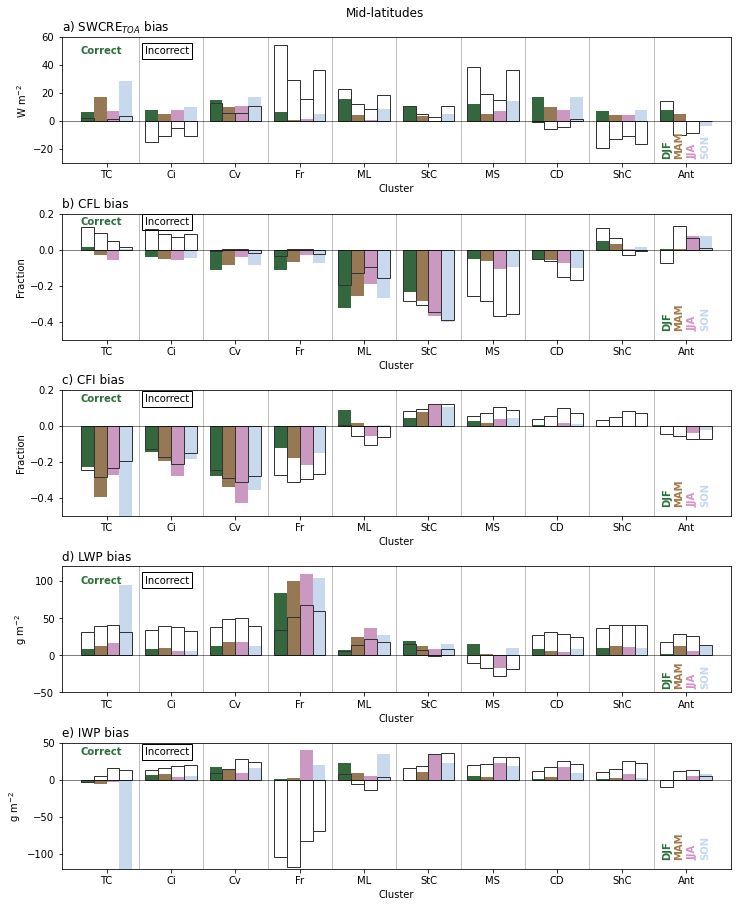

In [37]:
fig = plt.figure(figsize=(12,14))

ymin=-30
ymax=60
plot_agreements('SWCREtoa',Mnam,Mndm,nam,ndm,
                'W m$^{-2}$',
                'a) SWCRE$_{TOA}$ bias',511,
                ymin=ymin,ymax=ymax,
                legend='yes',num='no',labels=['Correct','Incorrect'])


#*******************************************************************
ymin=-0.5
ymax=0.2
plot_agreements('CFL',Mnam,Mndm,nam,ndm,
                'Fraction',
                'b) CFL bias',512,
                ymin=ymin,ymax=ymax,
                legend='yes',num='no',labels=['Correct','Incorrect'])


#*******************************************************************
ymin=-0.5
ymax=0.2
plot_agreements('CFI',Mnam,Mndm,nam,ndm,
                'Fraction',
                'c) CFI bias ',513,
                ymin=ymin,ymax=ymax,
                legend='yes',num='no',labels=['Correct','Incorrect'])


#*******************************************************************
ymin=-50
ymax=120
plot_agreements('LWP',Mnam,Mndm,nam,ndm,
                'g m$^{-2}$',
                'd) LWP bias',514,
                ymin=ymin,ymax=ymax,
                legend='yes',num='no',labels=['Correct','Incorrect'])


#*******************************************************************
ymin=-120
ymax=50
plot_agreements('IWP',Mnam,Mndm,nam,ndm,
                'g m$^{-2}$',
                'e) IWP bias',515,
                ymin=ymin,ymax=ymax,
                legend='yes',num='no',labels=['Correct','Incorrect'])


#*******************************************************************

plt.suptitle('Mid-latitudes')
plt.subplots_adjust(hspace=0.4,top=0.95)
plt.savefig('plots/Bias_cluster_agreement_all_mid-lats.pdf')

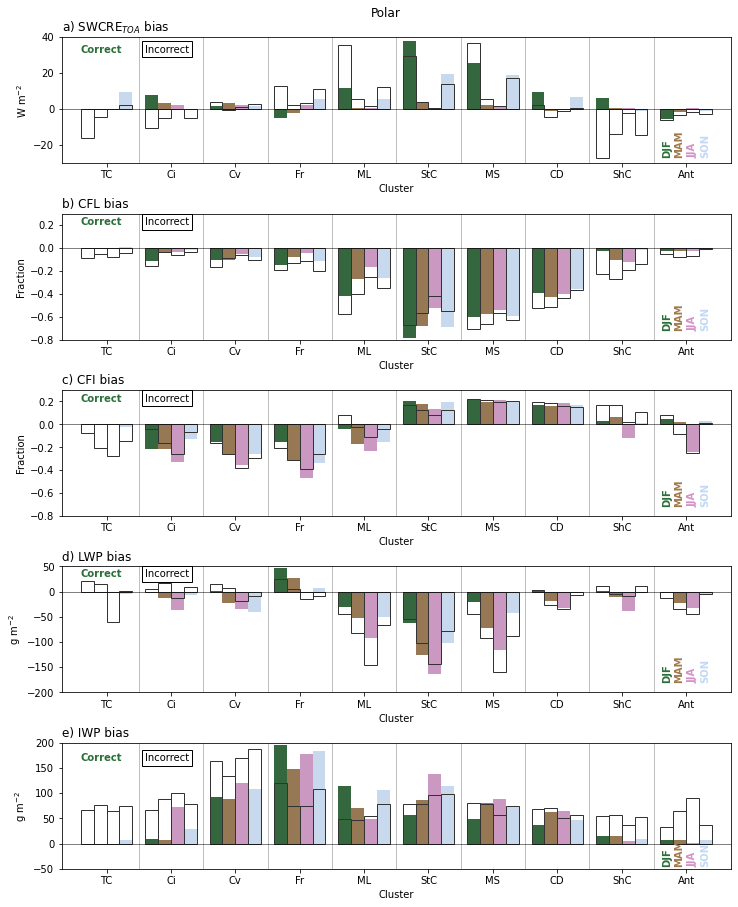

In [38]:
fig = plt.figure(figsize=(12,14))

ymin=-30
ymax=40
plot_agreements('SWCREtoa',Mnap,Mndp,nap,ndp,
                'W m$^{-2}$',
                'a) SWCRE$_{TOA}$ bias',511,
                ymin=ymin,ymax=ymax,
                legend='yes',num='no',labels=['Correct','Incorrect'])


#*******************************************************************
ymin=-0.8
ymax=0.3
plot_agreements('CFL',Mnap,Mndp,nap,ndp,
                'Fraction',
                'b) CFL bias',512,
                ymin=ymin,ymax=ymax,
                legend='yes',num='no',labels=['Correct','Incorrect'])


#*******************************************************************
ymin=-0.8
ymax=0.3
plot_agreements('CFI',Mnap,Mndp,nap,ndp,
                'Fraction',
                'c) CFI bias ',513,
                ymin=ymin,ymax=ymax,
                legend='yes',num='no',labels=['Correct','Incorrect'])


#*******************************************************************
ymin=-200
ymax=50
plot_agreements('LWP',Mnap,Mndp,nap,ndp,
                'g m$^{-2}$',
                'd) LWP bias',514,
                ymin=ymin,ymax=ymax,
                legend='yes',num='no',labels=['Correct','Incorrect'])


#*******************************************************************
ymin=-50
ymax=200
plot_agreements('IWP',Mnap,Mndp,nap,ndp,
                'g m$^{-2}$',
                'e) IWP bias',515,
                ymin=ymin,ymax=ymax,
                legend='yes',num='no',labels=['Correct','Incorrect'])


#*******************************************************************

plt.suptitle('Polar')
plt.subplots_adjust(hspace=0.4,top=0.95)
plt.savefig('plots/Bias_cluster_agreement_all_polar.pdf')

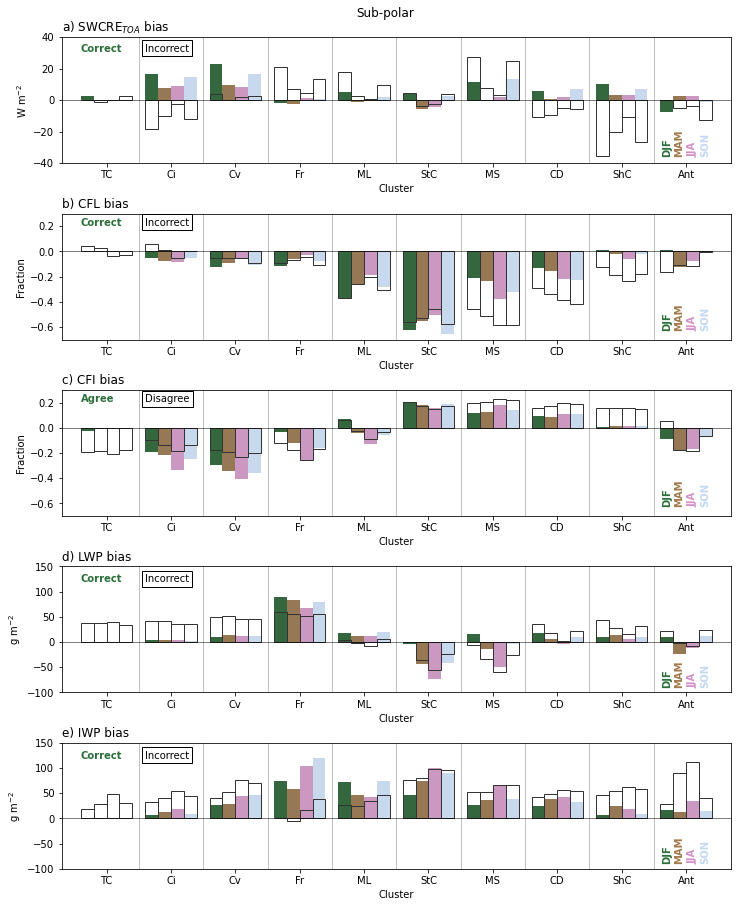

In [39]:
fig = plt.figure(figsize=(12,14))

ymin=-40
ymax=40
plot_agreements('SWCREtoa',Mnas,Mnds,nas,nds,
                'W m$^{-2}$',
                'a) SWCRE$_{TOA}$ bias',511,
                ymin=ymin,ymax=ymax,
                legend='yes',num='no',labels=['Correct','Incorrect'])


#*******************************************************************
ymin=-0.7
ymax=0.3
plot_agreements('CFL',Mnas,Mnds,nas,nds,
                'Fraction',
                'b) CFL bias',512,
                ymin=ymin,ymax=ymax,
                legend='yes',num='no',labels=['Correct','Incorrect'])


#*******************************************************************
ymin=-0.7
ymax=0.3
plot_agreements('CFI',Mnas,Mnds,nas,nds,
                'Fraction',
                'c) CFI bias ',513,
                ymin=ymin,ymax=ymax,
                legend='yes',num='no',labels=['Agree','Disagree'])


#*******************************************************************
ymin=-100
ymax=150
plot_agreements('LWP',Mnas,Mnds,nas,nds,
                'g m$^{-2}$',
                'd) LWP bias',514,
                ymin=ymin,ymax=ymax,
                legend='yes',num='no',labels=['Correct','Incorrect'])


#*******************************************************************
ymin=-100
ymax=150
plot_agreements('IWP',Mnas,Mnds,nas,nds,
                'g m$^{-2}$',
                'e) IWP bias',515,
                ymin=ymin,ymax=ymax,
                legend='yes',num='no',labels=['Correct','Incorrect'])


#*******************************************************************

plt.suptitle('Sub-polar')
plt.subplots_adjust(hspace=0.4,top=0.95)
plt.savefig('plots/Bias_cluster_agreement_all_sub-pol.pdf')

***
# Figure 6

Note this figure has been edited in Illustrator to make it pretty/useful  

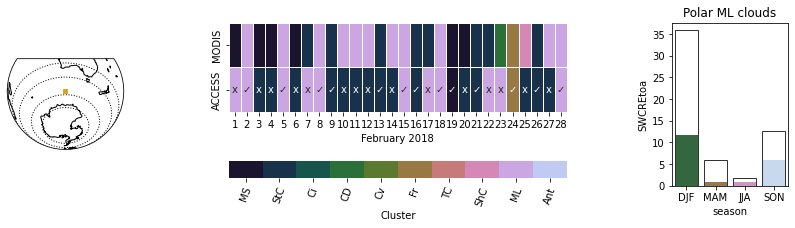

In [40]:
fig = plt.figure(figsize=(14,3))
spec = fig.add_gridspec(1, 4)

ax = fig.add_subplot(spec[0, 0],projection=ccrs.NearsidePerspective(120, -55,satellite_height=35785831))
#ax = plt.subplot(131, projection=ccrs.NearsidePerspective(120, -55,satellite_height=35785831))
ax.coastlines();
plot_line()
plt.scatter(120, -55,
     color='goldenrod', marker='s',s=10,
     transform=ccrs.PlateCarree(),);


#********************************************************************************************

ax = fig.add_subplot(spec[0, 1:3])

tmp = M10.interp(lon=120,lat=-55,method='nearest').sel(time=slice('2018-02-01','2018-02-28')).to_dataframe()[['Cluster']]
tmp = tmp.rename(columns={'Cluster':'MODIS'})
tmp['ACCESS'] = A10.interp(lon=120,lat=-55,method='nearest').sel(time=slice('2018-02-01','2018-02-28')).to_dataframe().Cluster

cm = truncate_colormap(plt.cm.cubehelix,0.1,0.8)
norm = colors.BoundaryNorm(np.arange(-0.5, 10.5, 1), cm.N)
labels=np.array([[' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' '],
                 ['x',u'\u2713','x','x',u'\u2713','x','x',u'\u2713',u'\u2713','x','x','x',u'\u2713','x',u'\u2713',u'\u2713','x',u'\u2713',u'\u2713','x',u'\u2713','x','x',u'\u2713','x',u'\u2713','x',u'\u2713']])
sns.heatmap(tmp.T,ax=ax,cmap=cm,norm=norm,annot=labels,fmt = '',linewidths=.5,cbar=True,
                cbar_kws=({'label':'Cluster','orientation':'horizontal','ticks':np.arange(0,10,1),'pad':0.3,}),
                xticklabels=tmp.index.day)
plt.xlabel('February 2018')


cbar = ax.collections[0].colorbar
cbar.ax.set_xticklabels(cluster_short_names,rotation=70);

#********************************************************************************************

ax = fig.add_subplot(spec[0, 3])

tmp = Mnap.where(Mnap['Cluster']==5)[['season','SWCREtoa']].dropna()
tmp2 = Mndp.where(Mnap['Cluster']==5)[['season','SWCREtoa']].dropna()
sns.barplot(data=tmp,x='season',y='SWCREtoa',palette=sns.color_palette("cubehelix",5)[1:],edgecolor='none',linewidth=3)
sns.barplot(data=tmp2,x='season',y='SWCREtoa',facecolor='none',edgecolor=".2")


plt.title('Polar ML clouds')

plt.subplots_adjust(wspace=0.9)

plt.savefig('plots/figure_description.pdf')

*********
# Other figures for publication

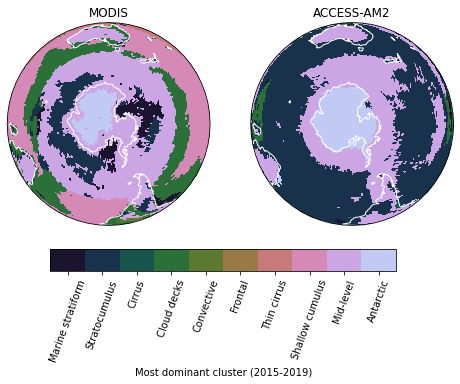

In [41]:
DC_M = RFO_M10.where(RFO_M10==RFO_M10.max(axis=0),drop=True) # find the most common cluster for each gridbox over time
for i,c in enumerate(DC_M.Cluster):
    DC_M[i,:,:] = (DC_M[i,:,:]/DC_M[i,:,:])+c-1 # for each cluster, divide by itslef to get 1, then replace with cluster number -1
DC_M = DC_M.max(axis=0)

DC_A = RFO_A10.where(RFO_A10==RFO_A10.max(axis=0),drop=True)
for i,c in enumerate(DC_A.Cluster):
    DC_A[i,:,:] = (DC_A[i,:,:]/DC_A[i,:,:])+c-1
DC_A = DC_A.max(axis=0)

fig = plt.figure(figsize=(8,6))
cm = truncate_colormap(plt.cm.cubehelix,0.1,0.8)

ax = plt.subplot(121, projection=ccrs.Orthographic(140, -90))
p = DC_M.T.plot(cmap=cm,
                transform=ccrs.PlateCarree(),
                ax = ax,
                levels=np.arange(0.5,11.5,1),
                add_colorbar=False,alpha=1);
p.axes.coastlines(color='white');
plt.title('MODIS',loc='center')

ax = plt.subplot(122, projection=ccrs.Orthographic(140, -90))
p = DC_A.T.plot(cmap=cm,
                transform=ccrs.PlateCarree(),
                ax = ax,
                levels=np.arange(0.5,11.5,1),
                add_colorbar=False,alpha=1);
p.axes.coastlines(color='white');
plt.title('ACCESS-AM2',loc='center')

cax = plt.axes([0.2, 0.3, 0.6, 0.05])
cbar = plt.colorbar(p,cax=cax,orientation='horizontal',
             label='Most dominant cluster (2015-2019)',ticks=np.arange(1,11));
cbar.ax.set_xticklabels(cluster_names,rotation=70);

plt.subplots_adjust(bottom=0.4)
plt.savefig('plots/dominant_clusters_SH.pdf')

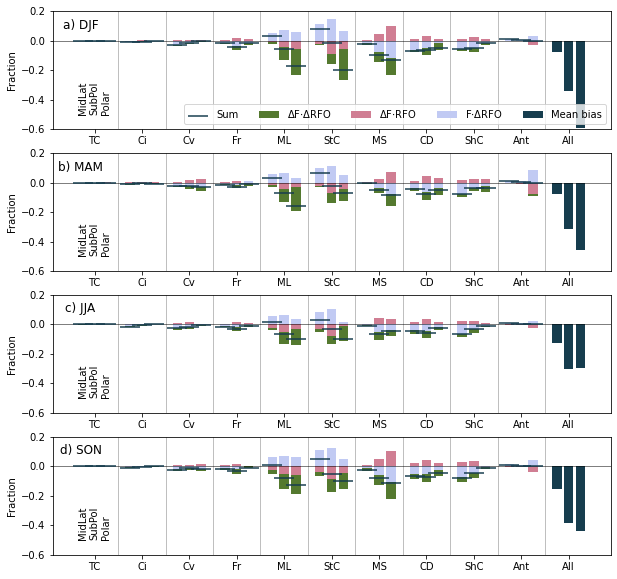

In [42]:
var = 'CFL'
cm = sns.color_palette("cubehelix",4)
x = [1,2,3,5,6,7,9,10,11,13,14,15,17,18,19,21,22,23,25,26,27,29,30,31,33,34,35,37,38,39]
names = np.array(cluster_short_names).copy()[order_for_plotting]
names = np.append(names,'All')
abc = ['a','b','c','d']
fig = plt.figure(figsize=(10,10))

for i,sea in enumerate(['DJF','MAM','JJA','SON']):
    a,b,c,d = data_for_bias_decomp_plot(sea,var)

    ax = plt.subplot(411+i)
    plt.bar(x=x,
            height=c[var],
            alpha=1,
            color=cm[1],label='$\Delta$F$\cdot$$\Delta$RFO')
    plt.bar(x=x,
            height=b[var],
            alpha=1,
            color=cm[2],label='$\Delta$F$\cdot$RFO')
    plt.bar(x=x,
            height=a[var],
            alpha=1,
            color=cm[3],label='F$\cdot$$\Delta$RFO')
    plt.scatter(x=x,y=d[var],
                marker='_',label='Sum',color=cm[0],s=400,zorder=20)
    
    plt.bar(x=[41,42,43],
            height=totaldf[[var,'Region']].where(totaldf.season==sea).dropna().sort_values(['Region'])[var],
            alpha=1,
            color=cm[0],label='Mean bias')
     
    plt.text(1,-0.5,'MidLat',rotation=90,horizontalalignment='center',verticalalignment='bottom')
    plt.text(2,-0.5,'SubPol',rotation=90,horizontalalignment='center',verticalalignment='bottom')
    plt.text(3,-0.5,'Polar',rotation=90,horizontalalignment='center',verticalalignment='bottom')
    
    [ax.axvline(i,color='grey',linewidth=0.5) for i in np.arange(4,44,4)]
    plt.title('{}) {}'.format(abc[i],sea),x=0.05,y=0.8)
    plt.axhline(0,color='black',linewidth=0.5)
    #[plt.axhline(x,color='grey',linewidth=0.5,linestyle='--') for x in np.arange(-15,40,5)]
    plt.ylim(-0.6,0.2);
    plt.ylabel('Fraction')
    ax.set_xticks(np.arange(2,44,4))
    ax.set_xticklabels(names)
    if sea=='DJF': plt.legend(ncol=5,loc='lower right');
        
plt.savefig('plots/CFL_bias_decomp_SO_regions.pdf')

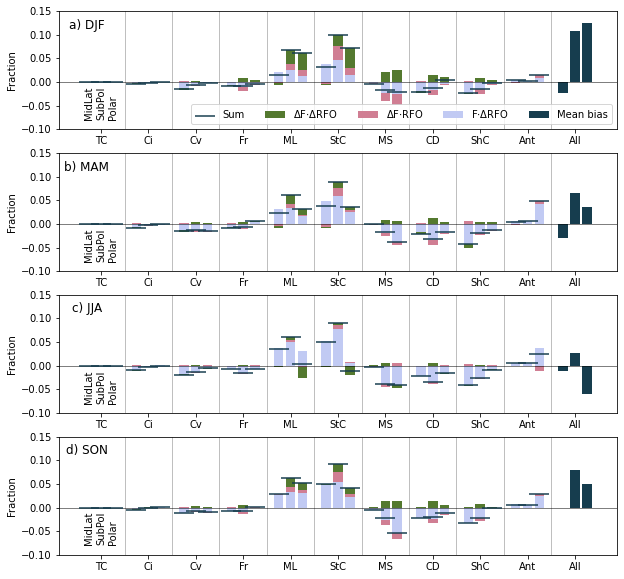

In [43]:
var = 'CFI'
cm = sns.color_palette("cubehelix",4)
x = [1,2,3,5,6,7,9,10,11,13,14,15,17,18,19,21,22,23,25,26,27,29,30,31,33,34,35,37,38,39]
names = np.array(cluster_short_names).copy()[order_for_plotting]
names = np.append(names,'All')
abc = ['a','b','c','d']
fig = plt.figure(figsize=(10,10))

for i,sea in enumerate(['DJF','MAM','JJA','SON']):
    a,b,c,d = data_for_bias_decomp_plot(sea,var)

    ax = plt.subplot(411+i)
    plt.bar(x=x,
            height=c[var],
            alpha=1,
            color=cm[1],label='$\Delta$F$\cdot$$\Delta$RFO')
    plt.bar(x=x,
            height=b[var],
            alpha=1,
            color=cm[2],label='$\Delta$F$\cdot$RFO')
    plt.bar(x=x,
            height=a[var],
            alpha=1,
            color=cm[3],label='F$\cdot$$\Delta$RFO')
    plt.scatter(x=x,y=d[var],
                marker='_',label='Sum',color=cm[0],s=400,zorder=20)
    
    plt.bar(x=[41,42,43],
            height=totaldf[[var,'Region']].where(totaldf.season==sea).dropna().sort_values(['Region'])[var],
            alpha=1,
            color=cm[0],label='Mean bias')
     
    plt.text(1,-0.08,'MidLat',rotation=90,horizontalalignment='center',verticalalignment='bottom')
    plt.text(2,-0.08,'SubPol',rotation=90,horizontalalignment='center',verticalalignment='bottom')
    plt.text(3,-0.08,'Polar',rotation=90,horizontalalignment='center',verticalalignment='bottom')
    
    [ax.axvline(i,color='grey',linewidth=0.5) for i in np.arange(4,44,4)]
    plt.title('{}) {}'.format(abc[i],sea),x=0.05,y=0.8)
    plt.axhline(0,color='black',linewidth=0.5)
    #[plt.axhline(x,color='grey',linewidth=0.5,linestyle='--') for x in np.arange(-15,40,5)]
    plt.ylim(-0.1,0.15);
    plt.ylabel('Fraction')
    ax.set_xticks(np.arange(2,44,4))
    ax.set_xticklabels(names)
    if sea=='DJF': plt.legend(ncol=5,loc='lower right');
        
plt.savefig('plots/CFI_bias_decomp_SO_regions.pdf')

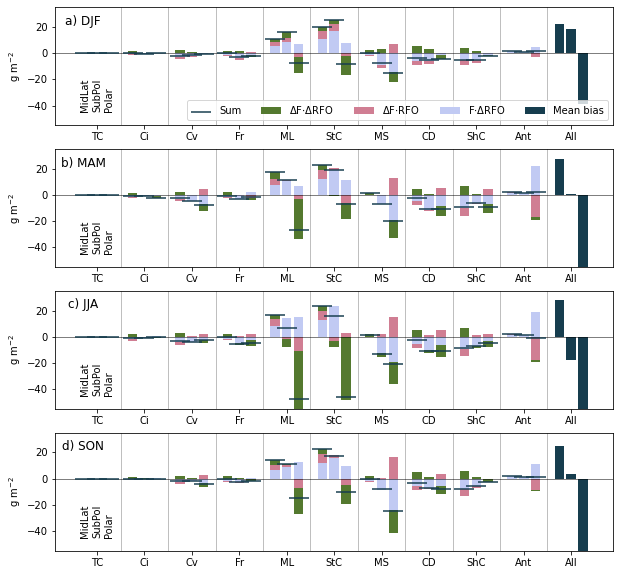

In [44]:
var = 'LWP'
cm = sns.color_palette("cubehelix",4)
x = [1,2,3,5,6,7,9,10,11,13,14,15,17,18,19,21,22,23,25,26,27,29,30,31,33,34,35,37,38,39]
names = np.array(cluster_short_names).copy()[order_for_plotting]
names = np.append(names,'All')
abc = ['a','b','c','d']
fig = plt.figure(figsize=(10,10))

for i,sea in enumerate(['DJF','MAM','JJA','SON']):
    a,b,c,d = data_for_bias_decomp_plot(sea,var)

    ax = plt.subplot(411+i)
    plt.bar(x=x,
            height=c[var],
            alpha=1,
            color=cm[1],label='$\Delta$F$\cdot$$\Delta$RFO')
    plt.bar(x=x,
            height=b[var],
            alpha=1,
            color=cm[2],label='$\Delta$F$\cdot$RFO')
    plt.bar(x=x,
            height=a[var],
            alpha=1,
            color=cm[3],label='F$\cdot$$\Delta$RFO')
    plt.scatter(x=x,y=d[var],
                marker='_',label='Sum',color=cm[0],s=400,zorder=20)
    
    plt.bar(x=[41,42,43],
            height=totaldf[[var,'Region']].where(totaldf.season==sea).dropna().sort_values(['Region'])[var],
            alpha=1,
            color=cm[0],label='Mean bias')
     
    plt.text(1,-45,'MidLat',rotation=90,horizontalalignment='center',verticalalignment='bottom')
    plt.text(2,-45,'SubPol',rotation=90,horizontalalignment='center',verticalalignment='bottom')
    plt.text(3,-45,'Polar',rotation=90,horizontalalignment='center',verticalalignment='bottom')
    
    [ax.axvline(i,color='grey',linewidth=0.5) for i in np.arange(4,44,4)]
    plt.title('{}) {}'.format(abc[i],sea),x=0.05,y=0.8)
    plt.axhline(0,color='black',linewidth=0.5)
    #[plt.axhline(x,color='grey',linewidth=0.5,linestyle='--') for x in np.arange(-15,40,5)]
    plt.ylim(-55,35);
    plt.ylabel('g m$^{-2}$')
    ax.set_xticks(np.arange(2,44,4))
    ax.set_xticklabels(names)
    if sea=='DJF': plt.legend(ncol=5,loc='lower right');
        
plt.savefig('plots/LWP_bias_decomp_SO_regions.pdf')

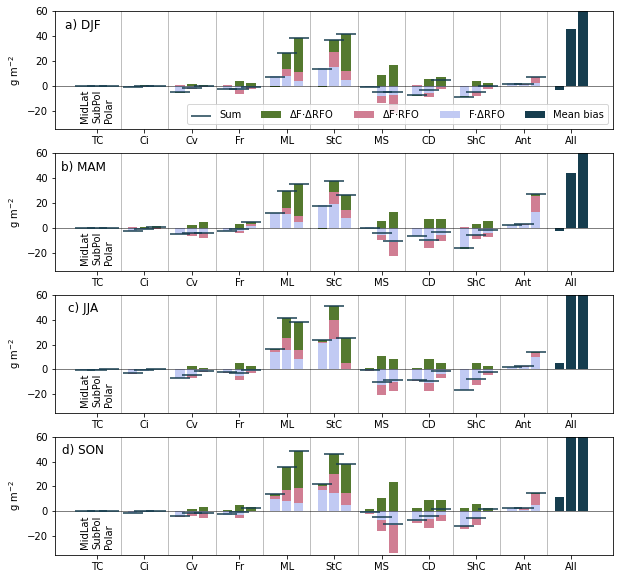

In [45]:
var = 'IWP'
cm = sns.color_palette("cubehelix",4)
x = [1,2,3,5,6,7,9,10,11,13,14,15,17,18,19,21,22,23,25,26,27,29,30,31,33,34,35,37,38,39]
names = np.array(cluster_short_names).copy()[order_for_plotting]
names = np.append(names,'All')
abc = ['a','b','c','d']
fig = plt.figure(figsize=(10,10))

for i,sea in enumerate(['DJF','MAM','JJA','SON']):
    a,b,c,d = data_for_bias_decomp_plot(sea,var)

    ax = plt.subplot(411+i)
    plt.bar(x=x,
            height=c[var],
            alpha=1,
            color=cm[1],label='$\Delta$F$\cdot$$\Delta$RFO')
    plt.bar(x=x,
            height=b[var],
            alpha=1,
            color=cm[2],label='$\Delta$F$\cdot$RFO')
    plt.bar(x=x,
            height=a[var],
            alpha=1,
            color=cm[3],label='F$\cdot$$\Delta$RFO')
    plt.scatter(x=x,y=d[var],
                marker='_',label='Sum',color=cm[0],s=400,zorder=20)
    
    plt.bar(x=[41,42,43],
            height=totaldf[[var,'Region']].where(totaldf.season==sea).dropna().sort_values(['Region'])[var],
            alpha=1,
            color=cm[0],label='Mean bias')
     
    plt.text(1,-30,'MidLat',rotation=90,horizontalalignment='center',verticalalignment='bottom')
    plt.text(2,-30,'SubPol',rotation=90,horizontalalignment='center',verticalalignment='bottom')
    plt.text(3,-30,'Polar',rotation=90,horizontalalignment='center',verticalalignment='bottom')
    
    [ax.axvline(i,color='grey',linewidth=0.5) for i in np.arange(4,44,4)]
    plt.title('{}) {}'.format(abc[i],sea),x=0.05,y=0.8)
    plt.axhline(0,color='black',linewidth=0.5)
    #[plt.axhline(x,color='grey',linewidth=0.5,linestyle='--') for x in np.arange(-15,40,5)]
    plt.ylim(-35,60);
    plt.ylabel('g m$^{-2}$')
    ax.set_xticks(np.arange(2,44,4))
    ax.set_xticklabels(names)
    if sea=='DJF': plt.legend(ncol=5,loc='lower right');
        
plt.savefig('plots/IWP_bias_decomp_SO_regions.pdf')

*********

# Other figures not used 

In [46]:
print((obs.SWCREtoa).mean(),(mod.SWCREtoa).mean())

<xarray.DataArray 'SWCREtoa' ()>
array(-53.88150278) <xarray.DataArray 'SWCREtoa' ()>
array(-45.2866, dtype=float32)


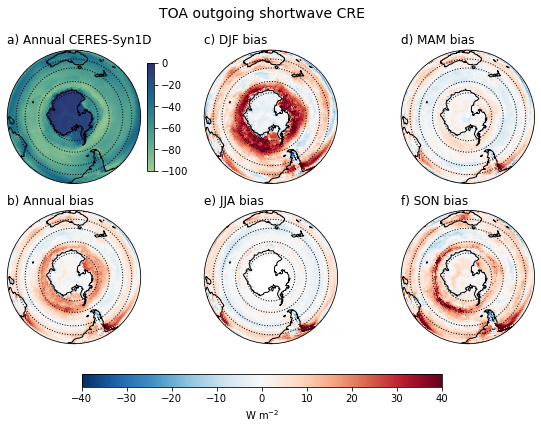

In [47]:
vmin=-40
vmax=40
fig = plt.figure(figsize=(10,6))
p2 = plot_biases((obs.SWCREtoa).mean('time'),'a) Annual CERES-Syn1D',231,-100,0,
                cmap=sns.color_palette("crest", as_cmap=True))
p = plot_biases((biases.SWCREtoa).mean('time'),'b) Annual bias',234,vmin,vmax,)
p = plot_biases((biasesea.SWCREtoa).sel(season='DJF'),'c) DJF bias',232,vmin,vmax)
p = plot_biases((biasesea.SWCREtoa).sel(season='MAM'),'d) MAM bias',233,vmin,vmax)
p = plot_biases((biasesea.SWCREtoa).sel(season='JJA'),'e) JJA bias',235,vmin,vmax)
p = plot_biases((biasesea.SWCREtoa).sel(season='SON'),'f) SON bias',236,vmin,vmax)
cax = plt.axes([0.25, 0.1, 0.5, 0.03])
plt.colorbar(p,cax=cax,orientation='horizontal',
     label='W m$^{-2}$');
cax = plt.axes([0.34, 0.60, 0.01, 0.25])
plt.colorbar(p2,cax=cax)
plt.suptitle('TOA outgoing shortwave CRE',size=14);
plt.subplots_adjust(bottom=0.2)
plt.savefig('plots/TOA_SWCRE_biases.pdf')

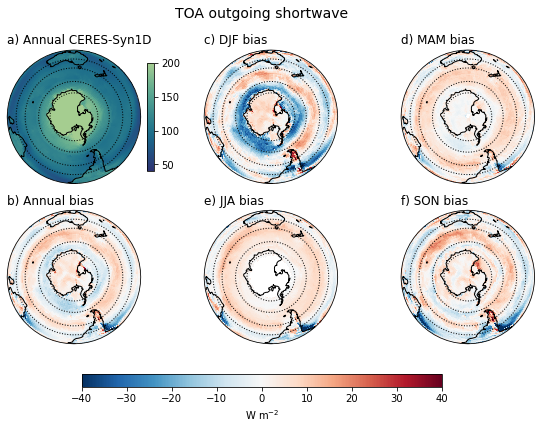

In [48]:
vmin=-40
vmax=40
fig = plt.figure(figsize=(10,6))
p2 = plot_biases((obs.SWtoa).mean('time'),'a) Annual CERES-Syn1D',231,40,200,
                cmap=sns.color_palette("crest_r", as_cmap=True))
p = plot_biases((biases.SWtoa).mean('time'),'b) Annual bias',234,vmin,vmax,)
p = plot_biases((biasesea.SWtoa).sel(season='DJF'),'c) DJF bias',232,vmin,vmax)
p = plot_biases((biasesea.SWtoa).sel(season='MAM'),'d) MAM bias',233,vmin,vmax)
p = plot_biases((biasesea.SWtoa).sel(season='JJA'),'e) JJA bias',235,vmin,vmax)
p = plot_biases((biasesea.SWtoa).sel(season='SON'),'f) SON bias',236,vmin,vmax)
cax = plt.axes([0.25, 0.1, 0.5, 0.03])
plt.colorbar(p,cax=cax,orientation='horizontal',
     label='W m$^{-2}$');
cax = plt.axes([0.34, 0.60, 0.01, 0.25])
plt.colorbar(p2,cax=cax)
plt.suptitle('TOA outgoing shortwave',size=14);
plt.subplots_adjust(bottom=0.2)
plt.savefig('plots/TOA_SW_biases.pdf')

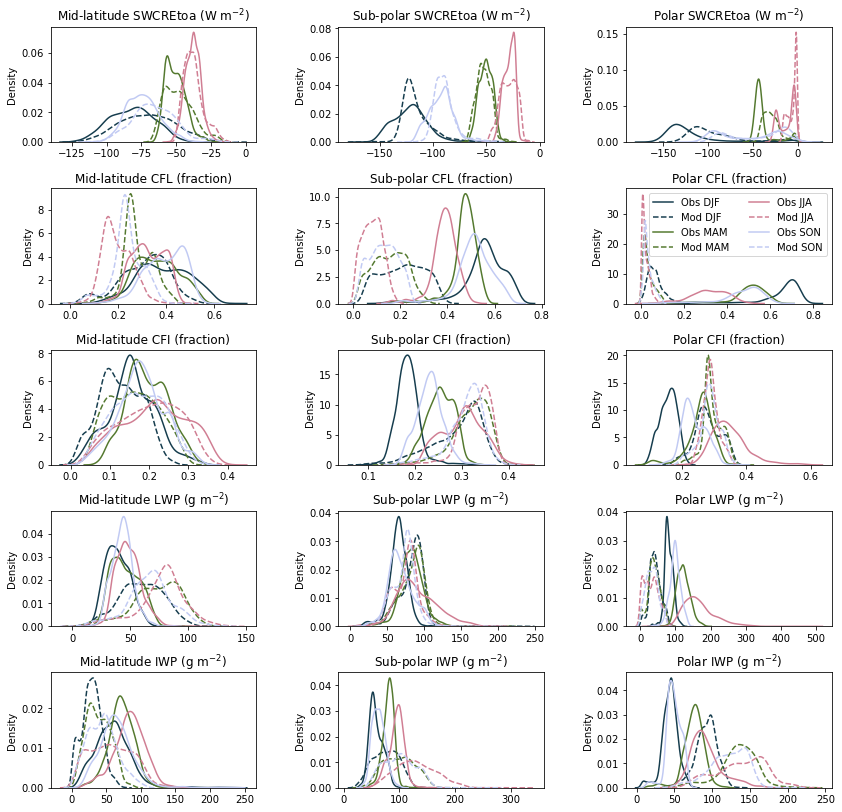

In [49]:
cm = sns.color_palette("cubehelix",4)
unit=['W m$^{-2}$','fraction','fraction','g m$^{-2}$','g m$^{-2}$']
fig = plt.figure(figsize=(14,14))

for v,var in enumerate(['SWCREtoa','CFL','CFI','LWP','IWP']):
    ax = plt.subplot(5,3,1+(3*v))
    for i,sea in enumerate(['DJF','MAM','JJA','SON']):
        sns.kdeplot(x=obssea[var].sel(lat=slice(-43,-30),season=sea).values.flatten(),color=cm[i])
        sns.kdeplot(x=modsea[var].sel(lat=slice(-43,-30),season=sea).values.flatten(),color=cm[i],linestyle='--',)
    plt.title('Mid-latitude {} ({})'.format(var,unit[v]))

    ax = plt.subplot(5,3,2+(3*v))
    for i,sea in enumerate(['DJF','MAM','JJA','SON']):
        sns.kdeplot(x=obssea[var].sel(lat=slice(-58,-43),season=sea).values.flatten(),color=cm[i],)
        sns.kdeplot(x=modsea[var].sel(lat=slice(-58,-43),season=sea).values.flatten(),color=cm[i],linestyle='--',)
    plt.title('Sub-polar {} ({})'.format(var,unit[v]))
    
    ax = plt.subplot(5,3,3+(3*v))
    for i,sea in enumerate(['DJF','MAM','JJA','SON']):
        sns.kdeplot(x=obssea[var].sel(lat=slice(-69,-58),season=sea).values.flatten(),color=cm[i],label='Obs {}'.format(sea))
        sns.kdeplot(x=modsea[var].sel(lat=slice(-69,-58),season=sea).values.flatten(),color=cm[i],linestyle='--',label='Mod {}'.format(sea))
    if v == 1: plt.legend(ncol=2);
    plt.title('Polar {} ({})'.format(var,unit[v]))
    
    
plt.subplots_adjust(hspace=0.4,wspace=0.4)
plt.savefig('plots/distributions.pdf',dpi=400)